In [3]:
!pip install --upgrade diffusers transformers scipy &> /dev/null

In [4]:
import matplotlib.pyplot as plt
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
from diffusers import StableDiffusionImg2ImgPipeline

In [5]:
!nvidia-smi

Thu Oct 13 07:45:30 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    32W / 250W |    257MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

在huggingface中获取token

  https://huggingface.co/settings/tokens

将token赋给hub_token

In [6]:
hub_token = 'TOKEN'


In [7]:
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", 
                                                   revision="fp16", 
                                                   torch_dtype=torch.float16, 
                                                   use_auth_token=hub_token) 

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

ftfy or spacy is not installed using BERT BasicTokenizer instead of ftfy.


In [8]:
pipe = pipe.to("cuda")

In [9]:
num_images = 4
prompt = ["two apples,rainy day, in the subway"] * num_images
torch.cuda.empty_cache()
torch.cuda.synchronize()
height = 512
width = 512
num_inference_steps = 30
guidance_scale = 7.5
with autocast("cuda"):
    out = pipe(prompt, height=height, width=width, num_inference_steps=num_inference_steps, guidance_scale=guidance_scale)
    images = out["sample"]
    del out

  0%|          | 0/31 [00:00<?, ?it/s]

In [10]:
len(images)

4

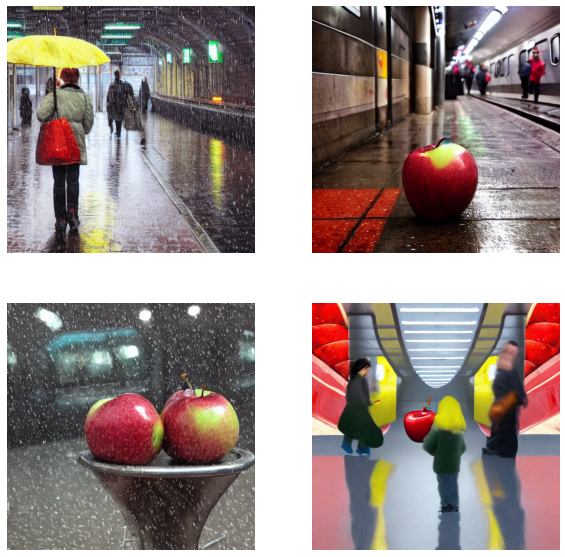

In [11]:
from PIL import Image
from math import sqrt, ceil

if num_images == 1:
    plt.imshow(images[0])
else:
    n = int(sqrt(num_images))
    m = ceil(num_images / n)
    fig, ax = plt.subplots(n,m, figsize=(10,10))
    for i, image in enumerate(images):
        ax[i//n,i%m].imshow(image)
        ax[i//n,i%m].axis('off')
plt.show()

In [14]:
images[0].save("TEST.png")